In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [49]:
file_path = 'Diwali_Sales.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    # If utf-8 fails, try 'ISO-8859-1' (latin1)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        # If ISO-8859-1 fails, try 'cp1252'
        df = pd.read_csv(file_path, encoding='cp1252')

In [50]:
df.head(7)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.0,NaN,NaN


In [51]:
df.shape

(11251, 15)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [53]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [54]:
df.shape

(11251, 13)

In [55]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.shape

(11239, 13)

In [58]:
df['Amount']=df['Amount'].astype('int')

In [59]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.00000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.48999,9453.610553
std,1.716039e+03,12.753866,0.493589,1.11513,5222.355168
min,1.000001e+06,12.000000,0.000000,1.00000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.00000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.00000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.00000,12675.000000
max,1.006040e+06,92.000000,1.000000,5.00000,23952.000000


In [60]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.00000,11239.000000
mean,35.410357,2.48999,9453.610553
std,12.753866,1.11513,5222.355168
min,12.000000,1.00000,188.000000
25%,27.000000,2.00000,5443.000000
50%,33.000000,2.00000,8109.000000
75%,43.000000,3.00000,12675.000000
max,92.000000,5.00000,23952.000000


# Data Exploration

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

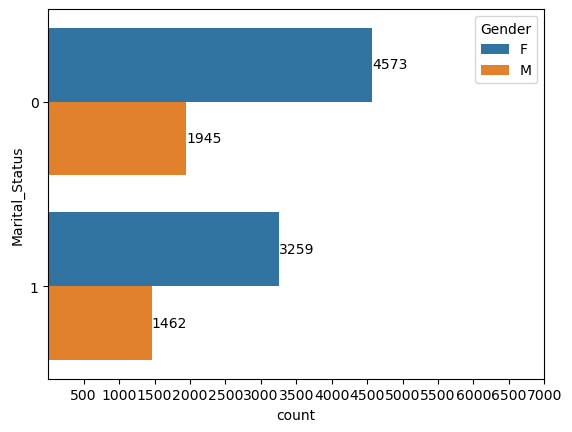

In [62]:
ay=sns.countplot(data=df, y='Marital_Status',hue='Gender')
plt.xticks(range(500, 7500, 500))  # Adjust the limits as needed
for bars in ay.containers:
    ay.bar_label(bars)
# Display the plot
plt.show()



In [63]:
sales=df.groupby(['Gender'],as_index=False)['Amount'].sum()

<Axes: xlabel='Gender', ylabel='Amount'>

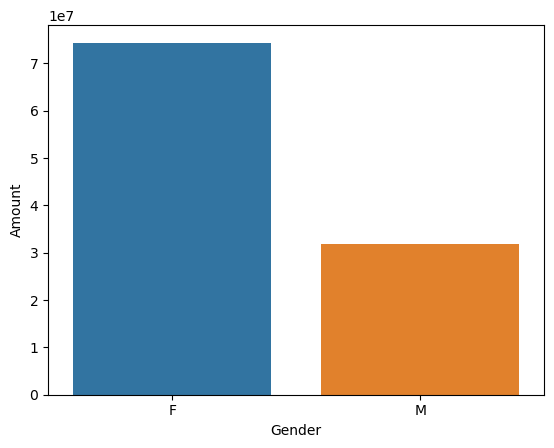

In [64]:
sns.barplot(x='Gender', y='Amount', data=sales)

 Insights:most of the buyers are females
          graph shows that unmarried individual is highly           tend to shop

<Axes: xlabel='Age Group', ylabel='count'>

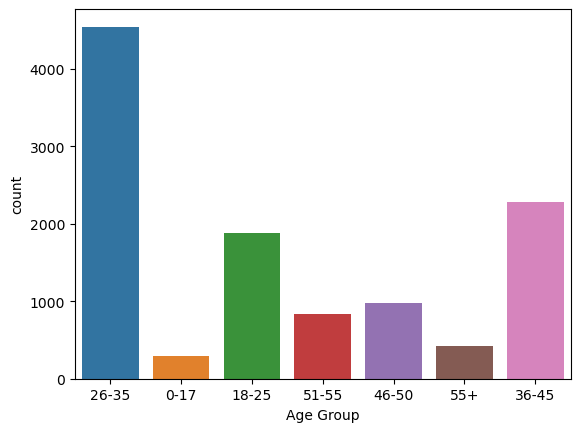

In [65]:
sns.countplot(x='Age Group',data=df)

In [66]:
df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142


<Axes: xlabel='State', ylabel='Amount'>

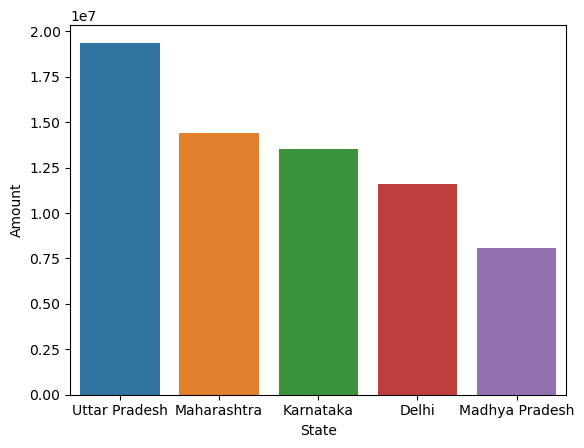

In [67]:
sales_by_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sns.barplot(x='State', y='Amount', data=sales_by_state)

In [68]:
order_by_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(7)


<Axes: xlabel='State', ylabel='Orders'>

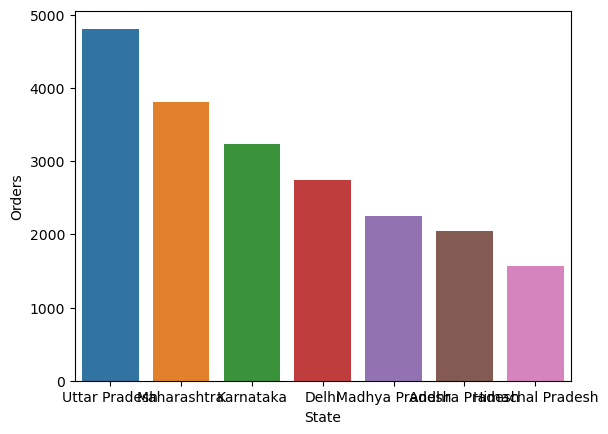

In [69]:
sns.barplot(x='State', y='Orders', data=order_by_state)

In [70]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [81]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [83]:
# Evaluate the model
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression R² Score:", lr_r2)

Linear Regression Mean Squared Error: 10212038.840344194
Linear Regression R² Score: 0.6248164456916316


In [101]:
data_dict = {
    'Gender': ['F'], # Replace with actual values
    'Age Group': ['18-25'], # Replace with actual values
    'Marital_Status': ['1'], # Replace with actual values
    'State': ['Uttar Pradesh'], # Replace with actual values
    'Zone': ['Central'], # Replace with actual values
    'Occupation': ['Lawyer'], # Replace with actual values
    'Product_Category': ['Auto'], # Replace with actual values
    # Add other columns if required
}

In [102]:
new_data = pd.DataFrame(data_dict)

In [103]:
new_data = pd.get_dummies(new_data, columns=['Gender', 'Age Group', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category'])

# Ensure the new data has the same columns as the training data
missing_cols = set(features.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0

In [104]:
new_data = new_data[features.columns]

# Step 3: Make predictions
predictions = lr_model.predict(new_data)

# Display predictions
print("Predicted Amount:", predictions[0])

Predicted Amount: 19533.875
